## Importing Libs 

In [42]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
from models import *
from layers import *
from train import *
from test import *
from vision_dataloaders import *
from plots import *
from torchsummary import summary
from visualize import *

In [44]:
from copy import deepcopy

In [45]:
from albumentations import Cutout

## Load Data 

### Getting normalization values

In [5]:
tfm_names = ['tensor']

tfms = create_transform(tfm_names)

data = VisionData.load(tfms=tfms,train=True)

u,s=data.images.mean((0,1,2))/255,data.images.std((0,1,2))/255

In [9]:
u,s

(array([0.49139968, 0.48215841, 0.44653091]),
 array([0.24703223, 0.24348513, 0.26158784]))

In [ ]:
tfm_names = ['normalize','tensor']


In [ ]:
tfms = create_transform(tfm_names=tfm_names,norm_constants=(u,s))

In [ ]:
tfms

In [ ]:
data = VisionData.load(tfms=tfms,train=True)

### Verifying our normalization


In [ ]:
imgs=[]
for i in range(len(data)):
    imgs.append(data[i][0])

In [ ]:
imgs = torch.stack(imgs)

In [ ]:
imgs.mean((0,2,3)),imgs.std((0,2,3))

### Trying augmentations 

In [ ]:
aug_data = VisionData.load(name='CIFAR10')

In [ ]:
img=[aug_data.images[20]]*32

In [ ]:
aug_data.images=np.array(img)

In [ ]:
assert np.allclose(aug_data[0][0],aug_data[1][0])

In [ ]:
#tfms = create_transform(tfm_names=['cutout','tensor'],angle=15,cutout_size=8,cutout_fillvalue=u)
tfms = create_transform(tfm_names=['normalize','cutout','tensor'],angle=15,cutout_size=16,cutout_fillvalue=u,norm_constants=(u,s),cutout_prob=0.75)

In [ ]:
aug_data.tfms=tfms

In [ ]:
tfms

In [ ]:
isCUDA = torch.cuda.is_available()
dev = torch.device('cuda') if isCUDA else torch.device('cpu')
dataloader_args = dict(shuffle=True,num_workers=4,batch_size = 8,pin_memory=True) if isCUDA else dict(shuffle=True,batch_size = 8//2)
dl=getDataLoader(aug_data,**dataloader_args)

In [ ]:
show_batch(dl)

### Defining DataLoaders

In [10]:
train_tfms = create_transform(tfm_names=['rotate','jitter','normalize','cutout','tensor'],norm_constant=(u,s),angle=15,cutout_size=16,
                        cutout_fillvalue=u,cutout_prob=0.75)
test_tfms = create_transform(tfm_names=['normalize','tensor'],norm_constant=(u,s))


train_data = VisionData.load(name='CIFAR10',tfms=train_tfms,train=True)
test_data = VisionData.load(name='CIFAR10',tfms=test_tfms,train=False)

train_dl,test_dl = getTrainTestLoader((train_data,test_data),BS=64)

## Model development 

In [13]:
model = ResNet(drop=True,p=0.15).cuda()

In [14]:
#model

In [15]:
#summary(model,input_size=(3,32,32))

## Training Model 

In [17]:
opt = optim.SGD(model.parameters(),lr=1e-3,momentum=0.9)
dls={}
dls['train']=train_dl
dls['valid']=test_dl
loss_func = nn.CrossEntropyLoss()
sched = StepLR(opt,step_size=15,gamma=0.3)

In [18]:
ldict = train(model,opt,dls,loss_func,40,scheduler=sched,device='cuda')

Training Loss:1.494, Training Acc:43.750: 100%|██████████| 782/782 [00:39<00:00, 20.03it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[0/40]--> Training Loss:1.778, Training Accuracy:33.620, Validation Loss:1.803, Validation Accuracy:37.830


Training Loss:1.266, Training Acc:37.500: 100%|██████████| 782/782 [00:39<00:00, 20.03it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[1/40]--> Training Loss:1.447, Training Accuracy:47.056, Validation Loss:1.348, Validation Accuracy:53.240


Training Loss:1.601, Training Acc:56.250: 100%|██████████| 782/782 [00:39<00:00, 19.98it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[2/40]--> Training Loss:1.269, Training Accuracy:54.138, Validation Loss:1.060, Validation Accuracy:62.710


Training Loss:1.254, Training Acc:56.250: 100%|██████████| 782/782 [00:39<00:00, 19.89it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[3/40]--> Training Loss:1.152, Training Accuracy:58.598, Validation Loss:0.977, Validation Accuracy:65.970


Training Loss:0.789, Training Acc:68.750: 100%|██████████| 782/782 [00:39<00:00, 19.83it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[4/40]--> Training Loss:1.050, Training Accuracy:62.506, Validation Loss:0.944, Validation Accuracy:67.030


Training Loss:0.512, Training Acc:81.250: 100%|██████████| 782/782 [00:39<00:00, 19.85it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[5/40]--> Training Loss:0.974, Training Accuracy:65.242, Validation Loss:0.774, Validation Accuracy:72.880


Training Loss:0.820, Training Acc:75.000: 100%|██████████| 782/782 [00:39<00:00, 19.82it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[6/40]--> Training Loss:0.907, Training Accuracy:67.796, Validation Loss:0.733, Validation Accuracy:74.960


Training Loss:0.541, Training Acc:75.000: 100%|██████████| 782/782 [00:39<00:00, 19.84it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[7/40]--> Training Loss:0.860, Training Accuracy:69.584, Validation Loss:0.693, Validation Accuracy:76.560


Training Loss:0.881, Training Acc:75.000: 100%|██████████| 782/782 [00:39<00:00, 19.79it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[8/40]--> Training Loss:0.812, Training Accuracy:71.326, Validation Loss:0.692, Validation Accuracy:76.990


Training Loss:1.132, Training Acc:68.750: 100%|██████████| 782/782 [00:39<00:00, 19.90it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[9/40]--> Training Loss:0.778, Training Accuracy:72.580, Validation Loss:0.633, Validation Accuracy:78.820


Training Loss:0.816, Training Acc:68.750: 100%|██████████| 782/782 [00:39<00:00, 19.74it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[10/40]--> Training Loss:0.736, Training Accuracy:74.132, Validation Loss:0.592, Validation Accuracy:80.190


Training Loss:0.816, Training Acc:68.750: 100%|██████████| 782/782 [00:39<00:00, 19.80it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[11/40]--> Training Loss:0.711, Training Accuracy:75.226, Validation Loss:0.566, Validation Accuracy:81.310


Training Loss:0.726, Training Acc:68.750: 100%|██████████| 782/782 [00:39<00:00, 19.78it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[12/40]--> Training Loss:0.685, Training Accuracy:75.758, Validation Loss:0.559, Validation Accuracy:81.540


Training Loss:1.092, Training Acc:56.250: 100%|██████████| 782/782 [00:39<00:00, 19.77it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[13/40]--> Training Loss:0.665, Training Accuracy:76.706, Validation Loss:0.554, Validation Accuracy:81.220


Training Loss:0.967, Training Acc:68.750: 100%|██████████| 782/782 [00:39<00:00, 19.77it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[14/40]--> Training Loss:0.637, Training Accuracy:77.434, Validation Loss:0.506, Validation Accuracy:82.870


Training Loss:0.470, Training Acc:81.250: 100%|██████████| 782/782 [00:39<00:00, 19.75it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[15/40]--> Training Loss:0.566, Training Accuracy:80.178, Validation Loss:0.469, Validation Accuracy:84.510


Training Loss:0.404, Training Acc:81.250: 100%|██████████| 782/782 [00:39<00:00, 19.81it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[16/40]--> Training Loss:0.555, Training Accuracy:80.658, Validation Loss:0.452, Validation Accuracy:85.170


Training Loss:0.428, Training Acc:87.500: 100%|██████████| 782/782 [00:39<00:00, 19.86it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[17/40]--> Training Loss:0.543, Training Accuracy:80.882, Validation Loss:0.458, Validation Accuracy:84.820


Training Loss:0.898, Training Acc:56.250: 100%|██████████| 782/782 [00:39<00:00, 19.75it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[18/40]--> Training Loss:0.537, Training Accuracy:81.310, Validation Loss:0.458, Validation Accuracy:85.020


Training Loss:0.735, Training Acc:75.000: 100%|██████████| 782/782 [00:39<00:00, 19.78it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[19/40]--> Training Loss:0.528, Training Accuracy:81.642, Validation Loss:0.447, Validation Accuracy:85.250


Training Loss:0.953, Training Acc:62.500: 100%|██████████| 782/782 [00:39<00:00, 19.78it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[20/40]--> Training Loss:0.520, Training Accuracy:81.900, Validation Loss:0.448, Validation Accuracy:85.270


Training Loss:0.903, Training Acc:75.000: 100%|██████████| 782/782 [00:39<00:00, 19.76it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[21/40]--> Training Loss:0.511, Training Accuracy:82.014, Validation Loss:0.451, Validation Accuracy:85.380


Training Loss:0.592, Training Acc:75.000: 100%|██████████| 782/782 [00:39<00:00, 19.77it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[22/40]--> Training Loss:0.508, Training Accuracy:82.220, Validation Loss:0.440, Validation Accuracy:85.750


Training Loss:0.786, Training Acc:75.000: 100%|██████████| 782/782 [00:39<00:00, 19.73it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[23/40]--> Training Loss:0.497, Training Accuracy:82.424, Validation Loss:0.440, Validation Accuracy:85.350


Training Loss:0.612, Training Acc:75.000: 100%|██████████| 782/782 [00:39<00:00, 19.75it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[24/40]--> Training Loss:0.490, Training Accuracy:82.738, Validation Loss:0.435, Validation Accuracy:85.920


Training Loss:0.987, Training Acc:62.500: 100%|██████████| 782/782 [00:39<00:00, 19.79it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[25/40]--> Training Loss:0.487, Training Accuracy:82.804, Validation Loss:0.427, Validation Accuracy:86.080


Training Loss:0.575, Training Acc:87.500: 100%|██████████| 782/782 [00:39<00:00, 19.71it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[26/40]--> Training Loss:0.483, Training Accuracy:83.036, Validation Loss:0.426, Validation Accuracy:86.050


Training Loss:0.656, Training Acc:62.500: 100%|██████████| 782/782 [00:39<00:00, 19.77it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[27/40]--> Training Loss:0.473, Training Accuracy:83.178, Validation Loss:0.426, Validation Accuracy:86.200


Training Loss:1.161, Training Acc:56.250: 100%|██████████| 782/782 [00:39<00:00, 19.77it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[28/40]--> Training Loss:0.469, Training Accuracy:83.502, Validation Loss:0.426, Validation Accuracy:86.210


Training Loss:0.303, Training Acc:87.500: 100%|██████████| 782/782 [00:39<00:00, 19.76it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[29/40]--> Training Loss:0.470, Training Accuracy:83.576, Validation Loss:0.418, Validation Accuracy:86.450


Training Loss:0.444, Training Acc:75.000: 100%|██████████| 782/782 [00:39<00:00, 19.77it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[30/40]--> Training Loss:0.440, Training Accuracy:84.420, Validation Loss:0.404, Validation Accuracy:86.880


Training Loss:1.093, Training Acc:68.750: 100%|██████████| 782/782 [00:39<00:00, 19.82it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[31/40]--> Training Loss:0.437, Training Accuracy:84.626, Validation Loss:0.403, Validation Accuracy:86.810


Training Loss:0.502, Training Acc:87.500: 100%|██████████| 782/782 [00:39<00:00, 19.84it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[32/40]--> Training Loss:0.427, Training Accuracy:84.968, Validation Loss:0.413, Validation Accuracy:86.770


Training Loss:0.507, Training Acc:81.250: 100%|██████████| 782/782 [00:39<00:00, 19.76it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[33/40]--> Training Loss:0.428, Training Accuracy:84.914, Validation Loss:0.400, Validation Accuracy:87.250


Training Loss:0.640, Training Acc:81.250: 100%|██████████| 782/782 [00:39<00:00, 19.86it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[34/40]--> Training Loss:0.429, Training Accuracy:84.900, Validation Loss:0.404, Validation Accuracy:86.720


Training Loss:0.550, Training Acc:81.250: 100%|██████████| 782/782 [00:39<00:00, 19.77it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[35/40]--> Training Loss:0.431, Training Accuracy:84.638, Validation Loss:0.400, Validation Accuracy:87.000


Training Loss:0.582, Training Acc:75.000: 100%|██████████| 782/782 [00:39<00:00, 19.71it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[36/40]--> Training Loss:0.422, Training Accuracy:85.140, Validation Loss:0.398, Validation Accuracy:87.050


Training Loss:0.420, Training Acc:81.250: 100%|██████████| 782/782 [00:39<00:00, 19.73it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[37/40]--> Training Loss:0.423, Training Accuracy:85.130, Validation Loss:0.396, Validation Accuracy:87.340


Training Loss:0.041, Training Acc:100.000: 100%|██████████| 782/782 [00:39<00:00, 19.76it/s]


  0%|          | 0/782 [00:00<?, ?it/s]


[38/40]--> Training Loss:0.421, Training Accuracy:85.148, Validation Loss:0.400, Validation Accuracy:87.080


Training Loss:0.330, Training Acc:87.500: 100%|██████████| 782/782 [00:39<00:00, 19.78it/s]



[39/40]--> Training Loss:0.420, Training Accuracy:85.184, Validation Loss:0.397, Validation Accuracy:87.210


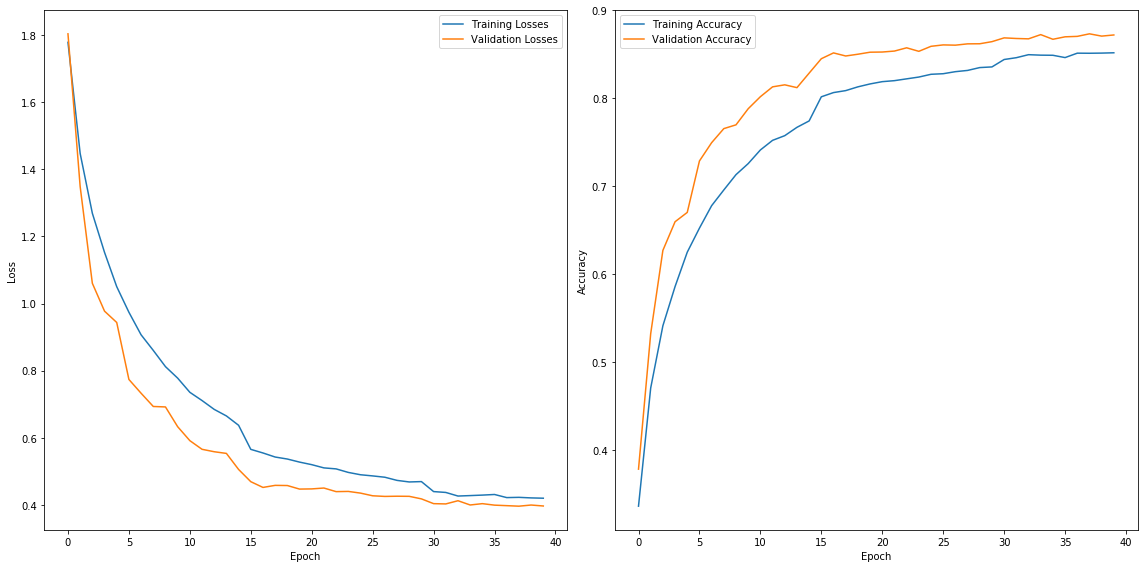

In [19]:
plot_diagnostics(ldict)

In [21]:
test_res=test(model,test_dl,loss_func,device='cuda')

In [24]:
test_res

{'Loss': 0.39707070088386537, 'Accuracy': 87.21}

In [25]:
torch.save(model.state_dict(),'model_87')

## GradCAM 

In [51]:
gradcam = GradCAM(model.to('cpu'),norm_constants=(u,s))

In [61]:
img = train_data.tfms(image=train_data.images[200])["image"].unsqueeze(0)
label = train_data.labels[200]

_=gradcam(img,'net.2.1.conv.1.lyrs.1',label,show=True)